In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def select_state(df, StateName, RegionName=None):
    # Use this function to choose your state / filter the dataframe

    is_state = df['StateName'] == StateName
    state_df = df[is_state]

    if RegionName:
        region = state_df['RegionName'] == RegionName
        return state_df[region]

    return state_df

In [3]:
path = 'raw-data/cities.csv'
df = pd.read_csv(path)
# dft = df.T.reset_index()
# city_labels = list(dft.iloc[2])
# dft.columns = city_labels

In [4]:
# Useful for filtering out unwanted columns, such as all non-numeric

needed_cols = df.columns[8:]
needed_cols = needed_cols.insert(0, ['RegionName', 'State'])
needed_cols = list(needed_cols)
df[needed_cols].head(3)

,RegionName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,New York,NY,254502.0,256327.0,258024.0,261064.0,263831.0,266684.0,269724.0,272430.0,...,705135.0,708951.0,712600.0,717893.0,723668.0,728128.0,731573.0,735888.0,740953.0,747396.0
1,Los Angeles,CA,248084.0,248328.0,249479.0,251632.0,254256.0,256669.0,259176.0,262001.0,...,932553.0,957576.0,973265.0,984791.0,988760.0,993971.0,1000492.0,1006305.0,1016479.0,1034423.0
2,Houston,TX,110965.0,110963.0,110752.0,110764.0,110726.0,110971.0,111167.0,111509.0,...,226699.0,231790.0,237311.0,241539.0,245188.0,247690.0,250565.0,253579.0,257034.0,261504.0


In [45]:
def get_city(df, RegionName):
    new_df = df.loc[df['RegionName'] == RegionName].T
    new_df.columns = [f'{RegionName}']
    
    return new_df[8:]

In [50]:
new = get_city(select_state(df, "CA"), 'Yucaipa')
new['Yucaipa'] = pd.to_numeric(new['Yucaipa'])
new

,Yucaipa
2000-01-31,155381.0
2000-02-29,156287.0
2000-03-31,156694.0
2000-04-30,157771.0
2000-05-31,158382.0
...,...
2021-11-30,515183.0
2021-12-31,520533.0
2022-01-31,528236.0
2022-02-28,536615.0


In [56]:
new2 = get_city(select_state(df, "CA"), 'Newport Beach')

In [74]:
merge_yn = pd.merge(new, new2, left_index=True, right_index=True)

<AxesSubplot:>

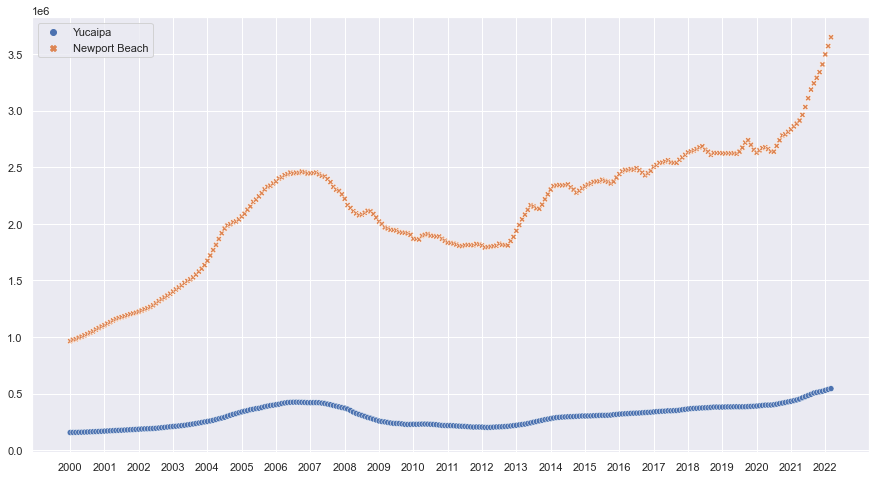

In [88]:
plt.figure(figsize=(15,8));
sns.set_theme()
# sns.set_style('whitegrid')
# output = sns.scatterplot(x=ca.index, y = ca.T.loc["Newport Beach"]);
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1));
sns.scatterplot(data=merge_yn, style=None)


In [83]:
sns.set_palette('deep')

KeyError: 'Yucaipa'

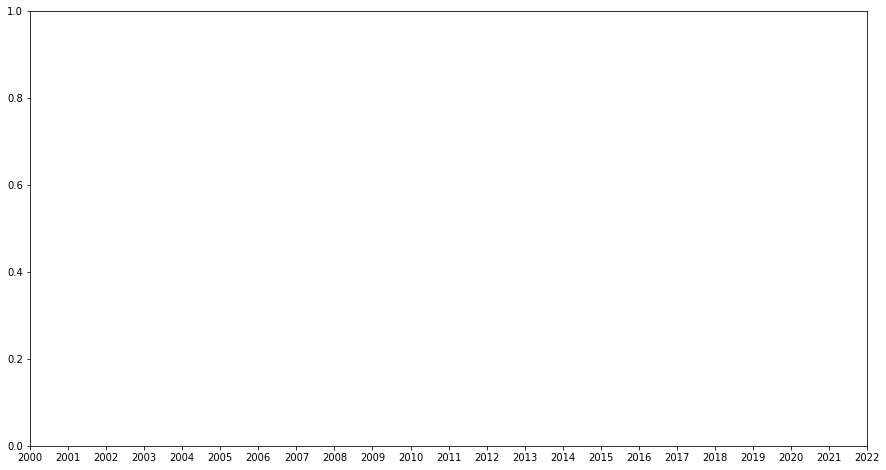

In [67]:
plt.figure(figsize=(15,8));
# output = sns.scatterplot(x=ca.index, y = ca.T.loc["Newport Beach"]);
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1));
sns.scatterplot(x=ca.index, y = df.T.loc["Yucaipa"]);
# sns.scatterplot(x=ca.index, y = ca.T.loc["Los Angeles"]);
sns.scatterplot(x=ca.index, y = ca.T.loc["Santa Maria"]);
# sns.scatterplot(x=ca.index, y = ca.T.loc["Banning"]);
sns.scatterplot(x=ca.index, y = ca.T.loc["Nipomo"]);

plt.ylabel('Median SFH Price')

